# Setup Google Drive Environment

In [ ]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = "1hToFUitLcAVfQ3OFW18blhSUfSVMYCX5"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('bank_churn.csv')

# **1: Data Exploration**

### 1.1 Understand dataset

In [ ]:
import pandas as pd
import numpy as np
churn_df = pd.read_csv('bank_churn.csv')

In [ ]:
# check data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# check the unique values for each column
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# Get target y
y = churn_df['Exited']

In [ ]:
#Understand features
#Check missing values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 1.2 Understand the features

In [ ]:
# understand Numerical feature
churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [ ]:
# check the feature distribution, using boxplot, distplot, countplot
import matplotlib.pyplot as plt
import seaborn as sns

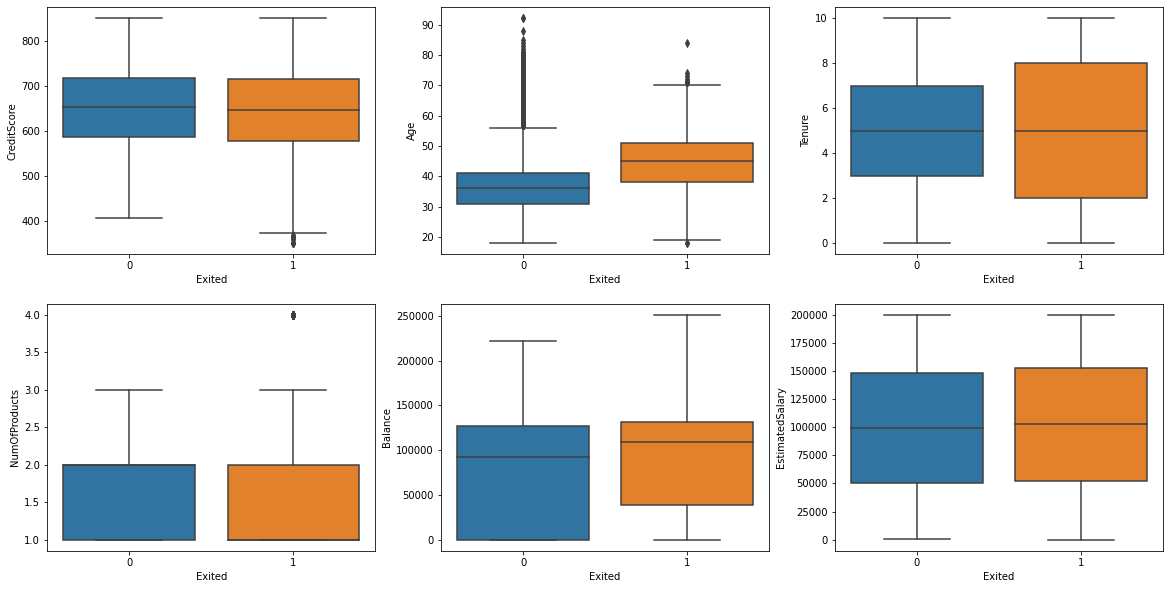

In [ ]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])

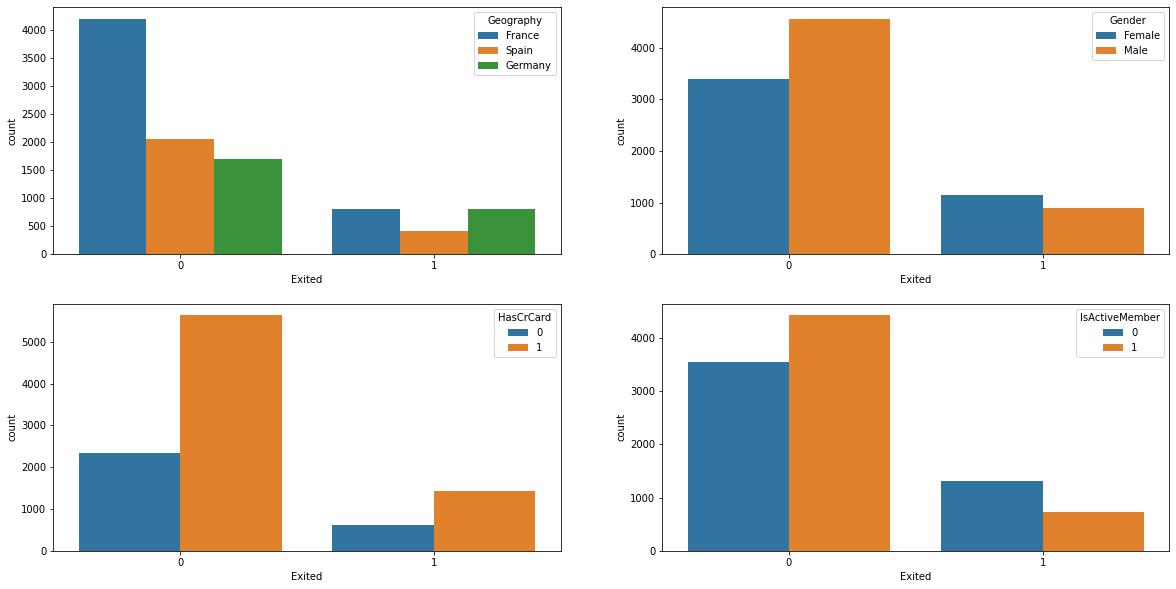

In [ ]:
# understand categorical feature

_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

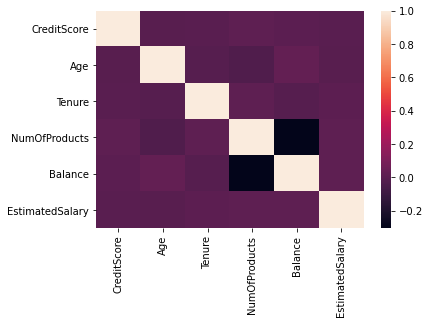

In [ ]:
# correlations between features, and using heatmap to show the correlation among them 
corr_score = churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()
sns.heatmap(corr_score)

In [ ]:
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


# **2**: **Feature preprocessing** 

### Dealing with features

In [ ]:
#Dropping useless feature
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis=1)

In [ ]:
category_cols = X.columns[X.dtypes == 'O']
numerical_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [ ]:
# Splite data into training and testing, ratio of training to testing is 4:1
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)

In [ ]:
#Using one hot encoding to handle categorical features
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc_onehot.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_onehot = OneHotEncoder()
enc_onehot.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_onehot, categories)
X_test = OneHotEncoding(X_test, enc_onehot, categories)

In [ ]:
#Using ordinal encoding for gender
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_ordinal = OrdinalEncoder()
enc_ordinal.fit(X_train[categories])

X_train[categories] = enc_ordinal.transform(X_train[categories])
X_test[categories] = enc_ordinal.transform(X_test[categories]) 

In [ ]:
#check the results
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,1.0,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,0.0,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,0.0,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,0.0,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,0.0,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


### Standardize the data



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# **3. Training the model**

### **3.1** **Model** **Training**

In [ ]:
#Using random forest, k nearest neighbors, logistic regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

RF_classifier = RandomForestClassifier()
KNN_classifier = KNeighborsClassifier()
logistic_classifier = LogisticRegression()

In [ ]:
#Train the model, predict test data, and get accuracy of test data
logistic_classifier.fit(X_train, y_train)
logistic_classifier.predict(X_test)
logistic_classifier.score(X_test, y_test)

0.8088

### **3.2 Find optimal hyperparameters by using grid search**

### 3.2.1 Find optimal hyperparameters for logistic regression

In [ ]:
from sklearn.model_selection import GridSearchCV

def print_grid_search_results(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [ ]:
#C is Lambda value for L1 and L2
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 1, 5, 10, 100)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 1, 5, 10, 100), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print_grid_search_results(Grid_LR)

Best score: 0.8125333333333333
Best parameters set:
C:1
penalty:l1


In [ ]:
best_LR =  Grid_LR.best_estimator_

### 3.2.2 Find optimal hyperparameters for KNN 

In [ ]:
#Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print_grid_search_results(Grid_KNN)

Best score: 0.8433333333333334
Best parameters set:
n_neighbors:9


In [ ]:
best_KNN = Grid_KNN.best_estimator_

### 3.2.3 Find optimal hyperparameters for random forest

In [ ]:
#Choose number of trees
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print_grid_search_results(Grid_RF)

Best score: 0.8644000000000002
Best parameters set:
max_depth:10
n_estimators:100


In [ ]:
best_RF = Grid_RF.best_estimator_

# **4. Model Evaluation**

### **4.1 Using k-fold cross validation**

In [ ]:
#Using cross validation(5 fold) to get the accuracy for different models
modelNames = ['Logistic Regression','KNN','Random Forest']
modelList = [logistic_classifier, KNN_classifier, RF_classifier]
count = 0

for classifier in modelList:
    score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(score)
    print('Model accuracy of ' + modelNames[count] + ' is ' + str(score.mean()))
    count += 1

[0.81933333 0.80666667 0.80666667 0.80933333 0.82      ]
Model accuracy of Logistic Regression is 0.8124
[0.84133333 0.84066667 0.83       0.83066667 0.84      ]
Model accuracy of KNN is 0.8365333333333334
[0.87666667 0.86533333 0.85533333 0.85866667 0.86866667]
Model accuracy of Random Forest is 0.8649333333333333


### **4.2 Using confusion matrix(precision, recall, accuracy)**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Calculate precision, recall, and accuracy
def confusion_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

#Print the confusion matrics
def print_confusion_matrics(confusion_matrics):
    classNames = ['Not','Churn']
    for cm in confusion_matrics:
        classifier, cm = cm[0], cm[1]
        confusion_evaluation(classifier, cm)

In [ ]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrics = [
    ("Random Forest", confusion_matrix(y_test,best_RF.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN.predict(X_test)))
]

print_confusion_matrics(confusion_matrics)

Random Forest
Accuracy is: 0.8608
precision is: 0.8084291187739464
recall is: 0.41453831041257366

Logistic Regression
Accuracy is: 0.8092
precision is: 0.5963855421686747
recall is: 0.1944990176817289

K nearest neighbor
Accuracy is: 0.8428
precision is: 0.7283464566929134
recall is: 0.36345776031434185



### **4.3 ROC&AUC**

### 4.3.1 ROC for random forest model

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

In [ ]:
rf_y_pred = best_RF.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred)

In [ ]:
best_RF.predict_proba(X_test)

array([[0.74537284, 0.25462716],
       [0.91771737, 0.08228263],
       [0.76165256, 0.23834744],
       ...,
       [0.84523022, 0.15476978],
       [0.95131452, 0.04868548],
       [0.9147614 , 0.0852386 ]])

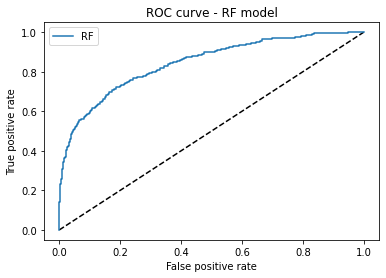

In [ ]:
# plot the ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rf_fpr, rf_tpr, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [ ]:
#Get the AUC score
metrics.auc(rf_fpr,rf_tpr)

0.845017707384606

### 3.4.2 ROC for logistic regression model

In [ ]:
lr_y_pred = best_LR.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, thresh = roc_curve(y_test, lr_y_pred)

In [ ]:
best_LR.predict_proba(X_test)

array([[0.82437347, 0.17562653],
       [0.93171956, 0.06828044],
       [0.85520065, 0.14479935],
       ...,
       [0.71451754, 0.28548246],
       [0.89279224, 0.10720776],
       [0.85560219, 0.14439781]])

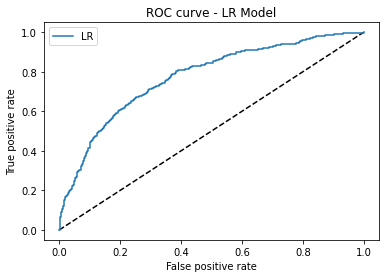

In [ ]:
#plot the ROC curve for logistic regression model
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(lr_fpr, lr_tpr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [ ]:
#get the AUC score
metrics.auc(lr_fpr,lr_tpr)

0.7722107045555687